## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:

def build_mlp(input_dim, output_unit = 10, num_neurons = [512, 256, 128], dropout_ratio = 0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_dim)
    for i, n_units in enumerate(num_neurons):
      if i == 0:
        hidden_layer = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer_{}'.format(i+1))(input_layer)
        hidden_layer = keras.layers.Dropout(dropout_ratio)(hidden_layer)
      else:
        hidden_layer = keras.layers.Dense(units=n_units, activation='relu', name = 'hidden_layer_{}'.format(i+1))(hidden_layer)
        hidden_layer = keras.layers.Dropout(dropout_ratio)(hidden_layer)
    output_layer = keras.layers.Dense(units=output_unit, activation='softmax', name='output_layer')(hidden_layer)
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model

In [6]:
"""Code Here
設定超參數
"""
learning_rate = 1e-3
epochs = 50
batch_size = 256
momentum = 0.95
dropout_set = [0.9, 0.5, 0.2]

In [18]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropout_ratio in dropout_set:
  keras.backend.clear_session()
  print('dropout_ratio:{}'.format(dropout_ratio))
  model = build_mlp(input_dim=x_train.shape[1:], dropout_ratio = dropout_ratio)
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
  # model.summary()
  # model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = [x_test, y_test], shuffle = True)
  model.fit(x_train, y_train, 
          epochs=epochs, 
          batch_size=batch_size, 
          validation_data=(x_test, y_test), 
          shuffle=True)
  # break

  train_loss = model.history.history['loss']
  val_loss = model.history.history['val_loss']
  train_acc = model.history.history['accuracy']
  val_acc = model.history.history['val_accuracy']

  name = 'dropout_rate = {}'.format(dropout_ratio)
  results[name] = {'train_loss':train_loss, 
                   'train_acc':train_acc, 
                   'val_loss':val_loss, 
                   'val_acc':val_acc}

dropout_ratio:0.9
Epoch 1/50
196/196 [==============================] - 2s 6ms/step - loss: 4.5724 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 2.3038 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 2.3061 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 2.3038 - accuracy: 0.0941 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 7/50
196/196 [==============================] - 1s 4ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3026 - val_accur

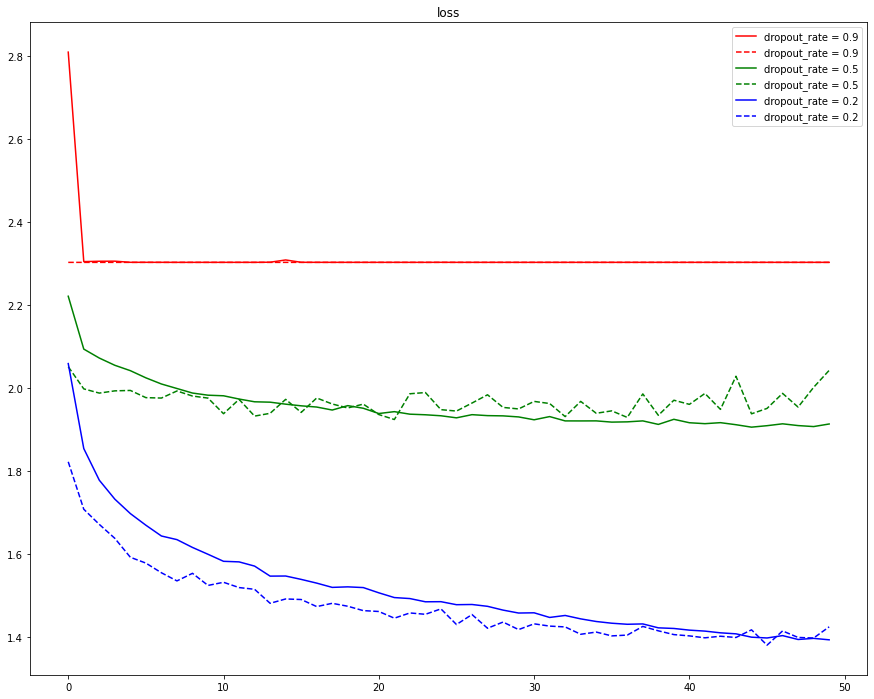

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'g', 'b']
plt.figure(figsize = (15, 12))
for i, cond in enumerate(results.keys()):
  plt.plot(range(len(results[cond]['train_loss'])), results[cond]['train_loss'], '-', label=cond, color = color_bar[i])
  plt.plot(range(len(results[cond]['val_loss'])), results[cond]['val_loss'], '--', label=cond, color = color_bar[i])
plt.title('loss')
plt.legend(loc='best')
plt.show()

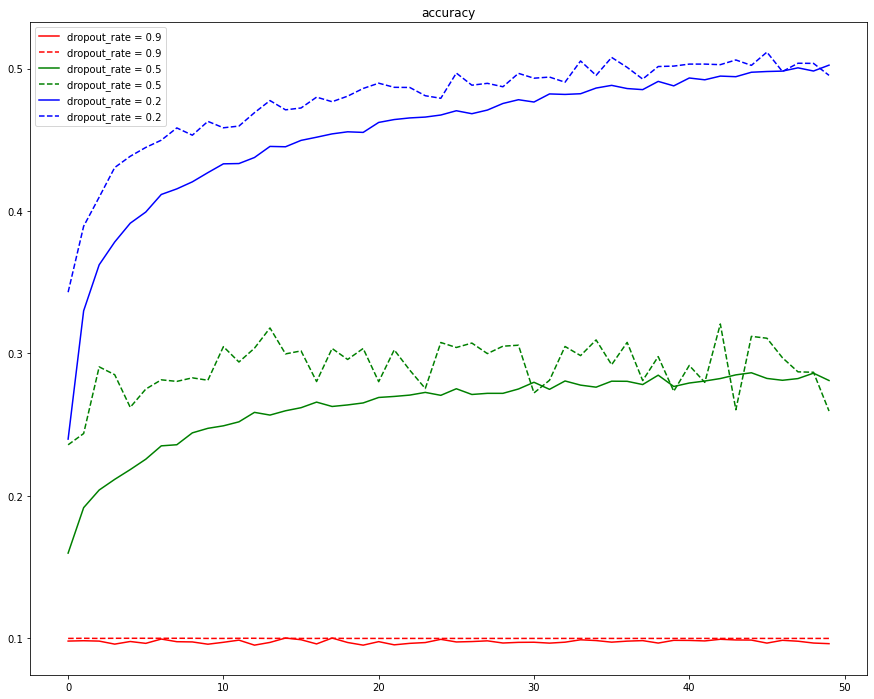

In [24]:
plt.figure(figsize = (15, 12))
for i, cond in enumerate(results.keys()):
  plt.plot(range(len(results[cond]['train_acc'])), results[cond]['train_acc'], '-', label=cond, color = color_bar[i])
  plt.plot(range(len(results[cond]['val_acc'])), results[cond]['val_acc'], '--', label=cond, color = color_bar[i])
plt.title('accuracy')
plt.legend(loc='best')
plt.show()